# EDA of Bike sharing data

In [1]:
import numpy as np
import pandas as pd
import missingno as mn
import os
import warnings

import statsmodels.api as sm
from statsmodels.formula.api import ols

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = 15, 7

In [3]:
warnings.filterwarnings("ignore")

## 1. Data import

In [4]:
DATADIR = '../data/bike/'
data_path = os.path.join(DATADIR, 'bike-sharing-houly.csv')

data = pd.read_csv(data_path, parse_dates={'date':[1]}, infer_datetime_format=True, header=0)

## 2. Basic data analysis

In [5]:
data.head().append(data.tail())

,date,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
17374,2012-12-31,17375,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,17376,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,17377,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,17378,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,2012-12-31,17379,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
date          17379 non-null datetime64[ns]
instant       17379 non-null int64
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(12)
memory usage: 2.3 MB


In [7]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
data.isna().sum()

date          0
instant       0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

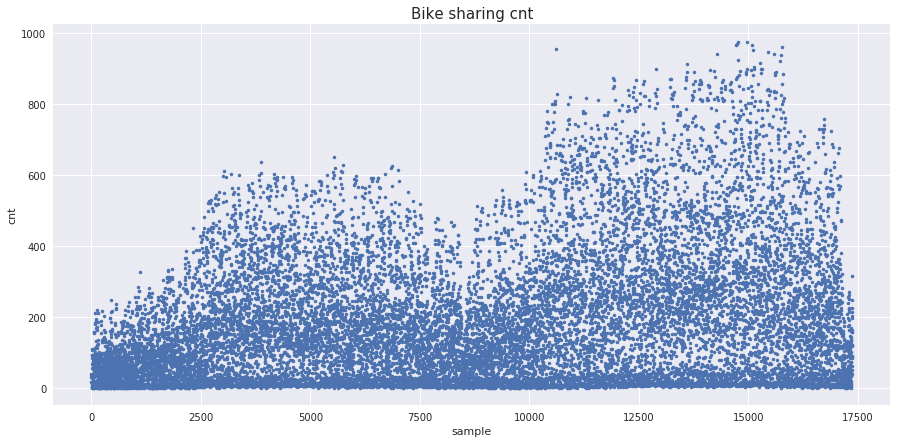

In [9]:
plt.plot(data.cnt, '.')
plt.title('Bike sharing cnt', fontsize=15)
plt.xlabel('sample')
plt.ylabel('cnt')
plt.show()

In [10]:
## no need for instant variable, so we will drop it
data.drop(columns=['instant'], inplace=True, axis=1)

In [11]:
data.head()

,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [12]:
data.shape

(17379, 16)

## 3. Factor analysis

In [13]:
# all the category variables are mapped to int64 
# lets change their data type to 'category'

def int_to_category(data):

    cat_features = data.columns[1:9]
    for features in cat_features:
        data[features] = data[features].astype('category')
        
    return data

In [14]:
data = int_to_category(data)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
date          17379 non-null datetime64[ns]
season        17379 non-null category
yr            17379 non-null category
mnth          17379 non-null category
hr            17379 non-null category
holiday       17379 non-null category
weekday       17379 non-null category
workingday    17379 non-null category
weathersit    17379 non-null category
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: category(8), datetime64[ns](1), float64(4), int64(3)
memory usage: 1.2 MB


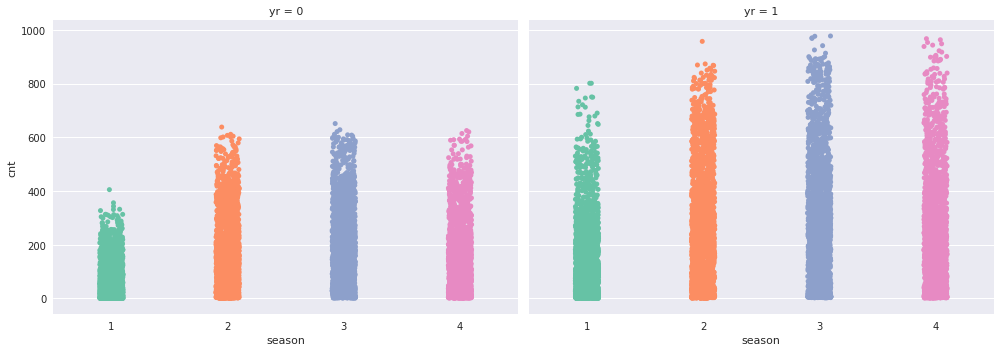

In [16]:
sns.catplot(data = data, x = 'season', y = "cnt", col = 'yr', palette = 'Set2', aspect=1.4)
plt.show()

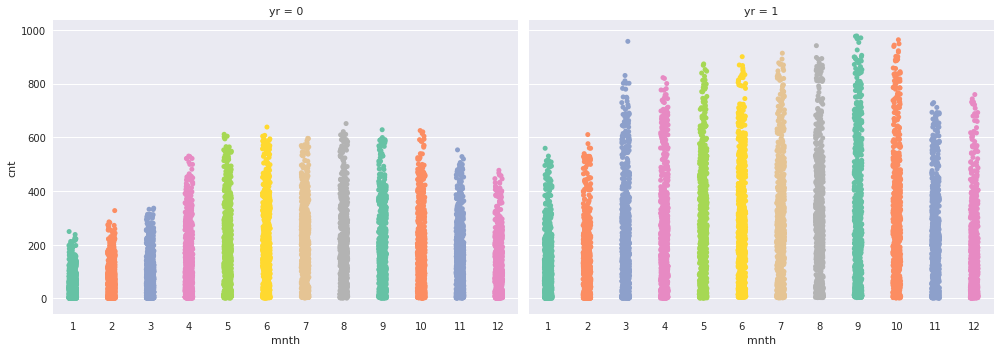

In [17]:
sns.catplot(data = data, x = 'mnth', y = "cnt", col='yr', palette = 'Set2', aspect=1.4)
plt.show()

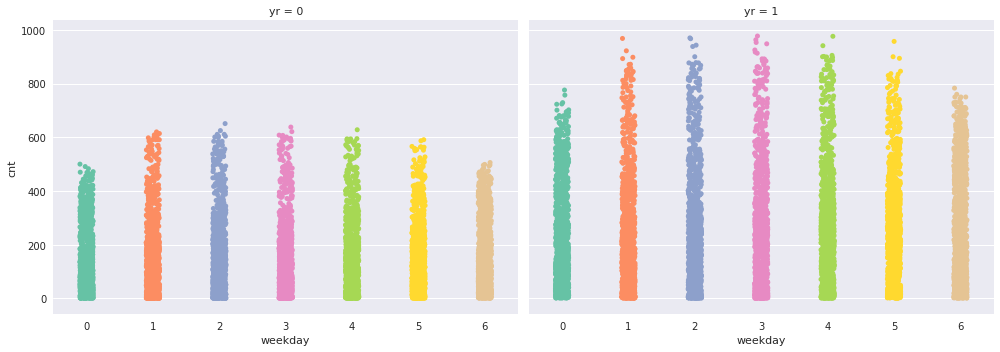

In [18]:
sns.catplot(data = data, x = 'weekday', y = "cnt", palette = 'Set2', aspect=1.4, col='yr')
plt.show()

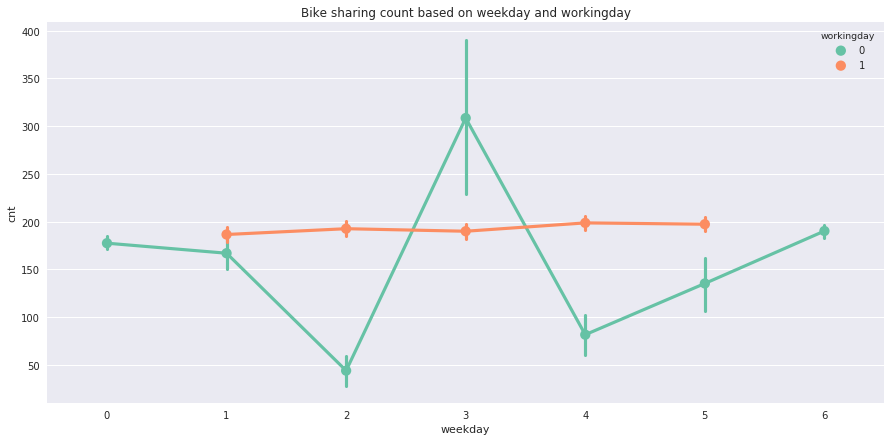

In [19]:
sns.pointplot(data = data, x = 'weekday', y = "cnt", hue='workingday', palette = 'Set2', aspect=1.4)
plt.title('Bike sharing count based on weekday and workingday')
plt.show()

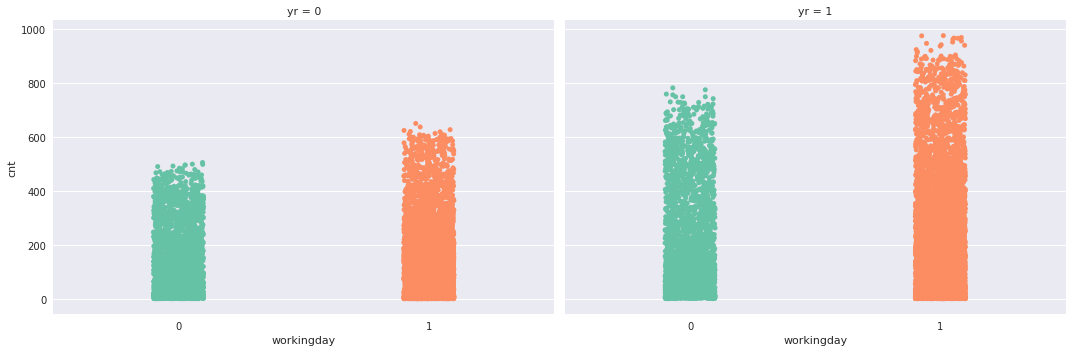

In [20]:
sns.catplot(data = data, x = 'workingday', y = "cnt", palette = 'Set2', aspect=1.5, col='yr')
plt.show()

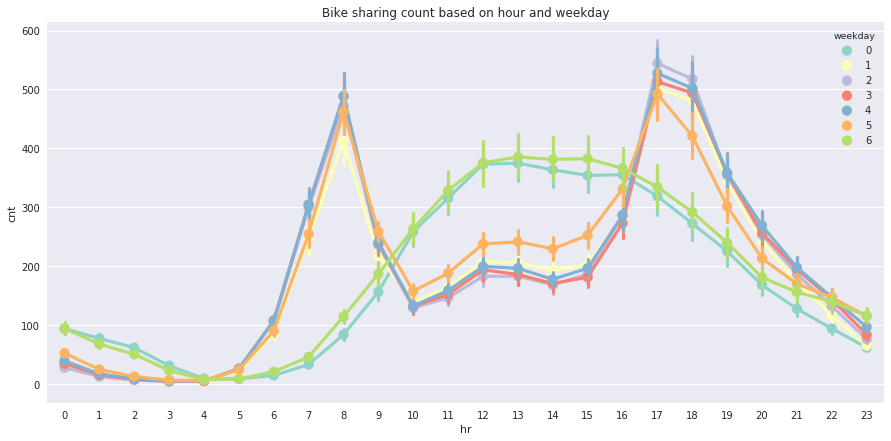

In [21]:
sns.pointplot(data = data, x = 'hr', y = "cnt", hue='weekday', palette = 'Set3', aspect=1.5)
plt.title('Bike sharing count based on hour and weekday')
plt.show()

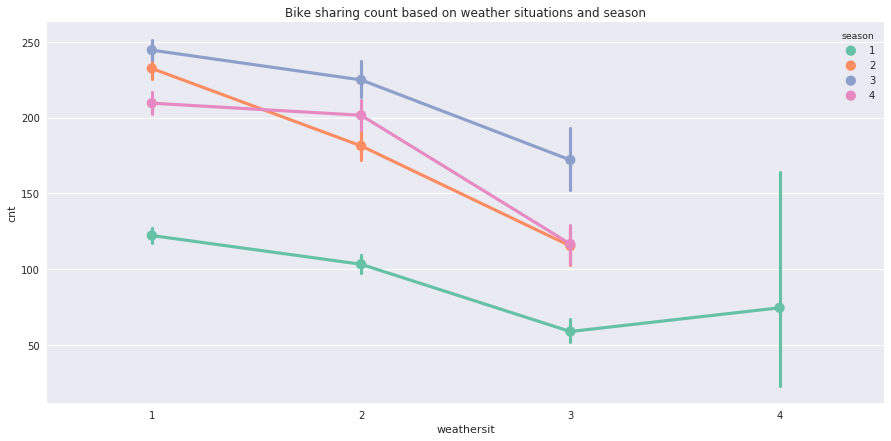

In [22]:
sns.pointplot(data = data, x = 'weathersit', y = "cnt", hue='season', palette = 'Set2', aspect=1.5)
plt.title('Bike sharing count based on weather situations and season')
plt.show()

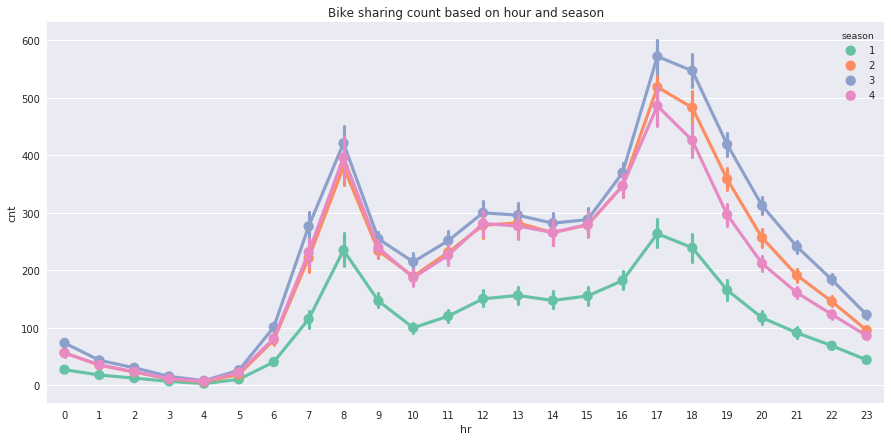

In [23]:
sns.pointplot(data = data, x = 'hr', y = "cnt", hue='season', palette = 'Set2', aspect=1.5)
plt.title('Bike sharing count based on hour and season')
plt.show()

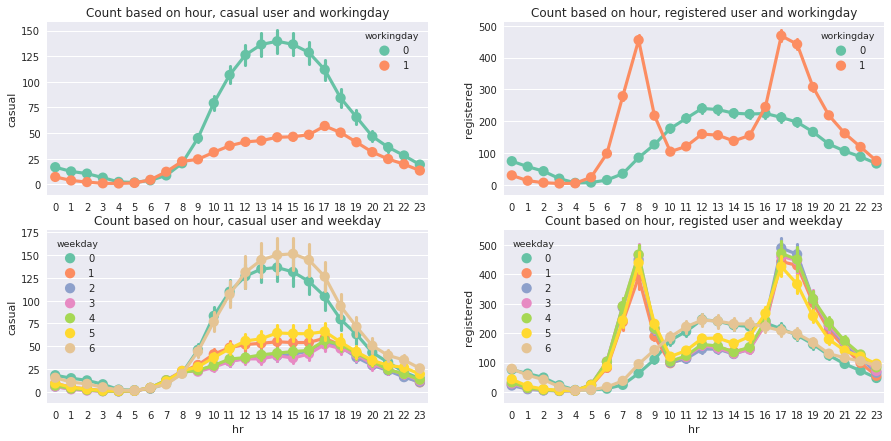

In [24]:
layout = (2, 2)
ax1 = plt.subplot2grid(layout, (0, 0))
ax2 = plt.subplot2grid(layout, (0, 1))
ax3 = plt.subplot2grid(layout, (1, 0))
ax4 = plt.subplot2grid(layout, (1, 1))

plt.rcParams['figure.figsize'] = 15, 10

sns.pointplot(data = data, x = 'hr', y = "casual", hue='workingday', palette = 'Set2', aspect=1.5, ax=ax1)
ax1.set(title='Count based on hour, casual user and workingday', xlabel='')

sns.pointplot(data = data, x = 'hr', y = "registered", hue='workingday', palette = 'Set2', aspect=1.5, ax=ax2)
ax2.set(title='Count based on hour, registered user and workingday', xlabel='')

sns.pointplot(data = data, x = 'hr', y = "casual", hue='weekday', palette = 'Set2', aspect=1.5, ax=ax3)
ax3.set(title='Count based on hour, casual user and weekday')

sns.pointplot(data = data, x = 'hr', y = "registered", hue='weekday', palette = 'Set2', aspect=1.5, ax=ax4)
ax4.set(title='Count based on hour, registed user and weekday')

plt.show()

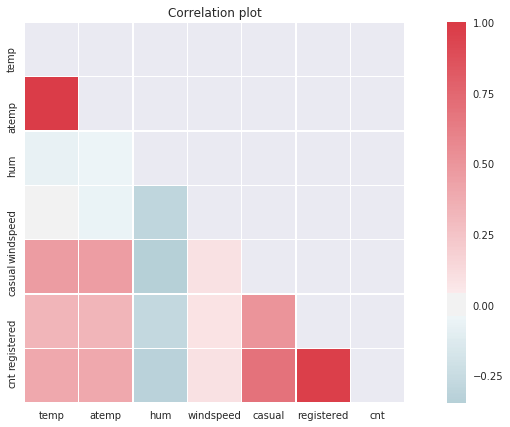

In [25]:
corr = data.corr()

plt.rcParams['figure.figsize'] = 15, 7

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, center=0, square=True, linewidths=.5, cmap=cmap)
plt.title('Correlation plot')
plt.show()

### Store the processed data

In [26]:
data.to_csv(os.path.join(DATADIR, 'processed_data_v1.csv'), index=False)

## 4. Feature engineering

### 4.1 Remove casual and registered features

- cnt = casual + registered
- Hence, considering casual and registered will lead to target leak so remove these features for modeling

In [27]:
data.drop(columns=['casual', 'registered'], axis=1, inplace=True)

In [28]:
data.head()

,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


## 4.2 Feature engineering for Hurricane Sandy

- Hurricane Sandy started on 12th Oct 2012.
- It would have greatly impacted the bike sharing counts
- So, lets add a flag for Harricane Sandy
- Before 12.10.2012 the flag will be 0 and after 12.10.2012 it will be 1.

In [29]:
def hurricane_sandy_flag(data):

    # start date : 12.10.2012
    data['HurricaneSandy'] = np.where((data['date']>=pd.Timestamp(2012, 10, 12).date()), 1, 0)

    return data

In [30]:
data = hurricane_sandy_flag(data)

In [31]:
data.head()

,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,HurricaneSandy
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16,0
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40,0
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32,0
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13,0
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,0


In [32]:
data.to_csv(os.path.join(DATADIR, 'processed_data.csv'), index=False)